In [2]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../..'))

from PySDM.physics import si
from PySDM.initialisation.spectral_sampling import ConstantMultiplicity
from PySDM.initialisation.spectra import Exponential
from PySDM.physics.formulae import volume

## Golovin Kernel

First set the kernel constant (collisions per second per particle volume) to some number

In [18]:
golovin_const = 1e4 / si.um**3 / si.s

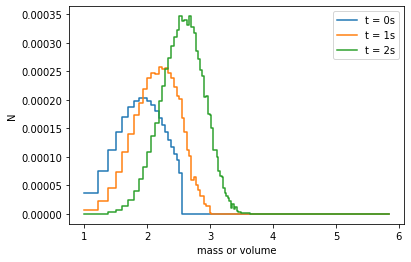

In [19]:
n_sd = 2**17
initial_spectrum = Exponential(norm_factor=8.39e12, scale=15 * si.um**3)
attributes = {}
attributes['volume'], attributes['n'] =\
    ConstantMultiplicity(spectrum=initial_spectrum).sample(n_sd)

from PySDM import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from PySDM.dynamics.coalescence.kernels import Golovin
from PySDM.backends import CPU
from PySDM.products.state import ParticlesVolumeSpectrum

builder = Builder(n_sd=n_sd, backend=CPU)
builder.set_environment(Box(dt=1 * si.s, dv=1))
builder.add_dynamic(Coalescence(kernel=Golovin(b = golovin_const)))
products = [ParticlesVolumeSpectrum()]
particles = builder.build(attributes, products)

from matplotlib import pyplot
import numpy as np

v_bins_edges = np.linspace((1 * si.um**3), (200 * si.um**3), num=256)
r_bins_edges = v_bins_edges**(1/3)

for step in [0, 1, 2]:
    particles.run(step - particles.n_steps)
    pyplot.step(x=r_bins_edges[:-1] / si.um,
                y=particles.products['dv/dlnr'].get(r_bins_edges),
                where='post', label=f"t = {step}s")
                
#pyplot.xscale('log')
pyplot.xlabel('mass or volume')
pyplot.ylabel("N")
pyplot.legend()

Now set it to some different value of a different order of magnitude. Notice that the profiles do not change indicating that the dynamics have remained the same despite the change in the constant.

In [22]:
golovin_const = 1e2 / si.um**3 / si.s

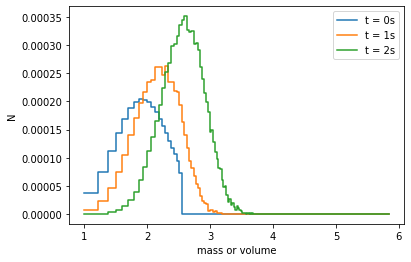

In [23]:
n_sd = 2**17
initial_spectrum = Exponential(norm_factor=8.39e12, scale=15 * si.um**3)
attributes = {}
attributes['volume'], attributes['n'] =\
    ConstantMultiplicity(spectrum=initial_spectrum).sample(n_sd)

from PySDM import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from PySDM.dynamics.coalescence.kernels import Golovin
from PySDM.backends import CPU
from PySDM.products.state import ParticlesVolumeSpectrum

builder = Builder(n_sd=n_sd, backend=CPU)
builder.set_environment(Box(dt=1 * si.s, dv=1))
builder.add_dynamic(Coalescence(kernel=Golovin(b = golovin_const)))
products = [ParticlesVolumeSpectrum()]
particles = builder.build(attributes, products)

from matplotlib import pyplot
import numpy as np

v_bins_edges = np.linspace((1 * si.um**3), (200 * si.um**3), num=256)
r_bins_edges = v_bins_edges**(1/3)

for step in [0, 1, 2]:
    particles.run(step - particles.n_steps)
    pyplot.step(x=r_bins_edges[:-1] / si.um,
                y=particles.products['dv/dlnr'].get(r_bins_edges),
                where='post', label=f"t = {step}s")
                
#pyplot.xscale('log')
pyplot.xlabel('mass or volume')
pyplot.ylabel("N")
pyplot.legend()